In [1]:
import numpy as np, curvedsky as cs, plottools as pl, cmb as CMB, cosmology, healpy as hp, warnings, local
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [40]:
def calc_fgcl(fgfiles,W,nside=2048,lmax=2048):
    cl = {}
    for key in fgfiles.keys():
        print(key)
        Tfg = W * hp.ud_grade(hp.fitsfunc.read_map(fgfiles[key],field=0),nside)
        #Qfg = hp.fitsfunc.read_map(fgfiles[key],field=1)
        #Ufg = hp.fitsfunc.read_map(fgfiles[key],field=2)
        Tlm = cs.utils.hp_map2alm(nside,lmax,lmax,Tfg)
        cl[key] = cs.utils.alm2cl(lmax,Tlm)
    return cl

In [2]:
aobj = local.init_analysis(freq='143',ascale=0.5)

In [13]:
wind = local.set_mask(aobj.famask)[0]

In [14]:
mask = hp.fitsfunc.read_map('../data/plk_biref/mask/COM_Mask_Lensing_2048_R3.00_a1.0deg.fits')

In [35]:
cl = calc_fgcl(aobj.fgmap,mask*wind)

clusterirps
freefree
stronguchii
kineticsz
synchrotron
co
faintirps
faintps
faintradiops
spindust
strongps
strongradiops
sz
thermaldust
thermalsz


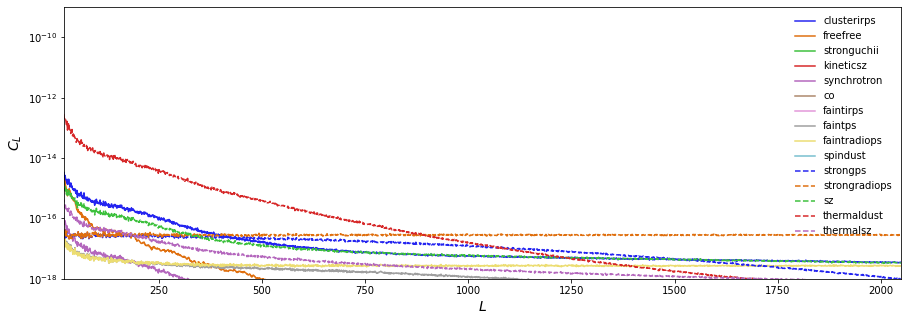

In [36]:
pl.plot_1dstyle(fsize=[15,5],ylog=True,ymin=1e-18,ymax=1e-9)
for i, key in enumerate(fgfiles.keys()):
#for key in ['thermaldust','stronguchii']:
    ls = '-'
    if i>=10: ls='--'
    plot(cl[key],label=key,ls=ls)
legend()

In [41]:
cl = calc_fgcl(aobj.fgmap,wind)

clusterirps
freefree
stronguchii
kineticsz
synchrotron
co
faintirps
faintps
faintradiops
spindust
strongps
strongradiops
sz
thermaldust
thermalsz


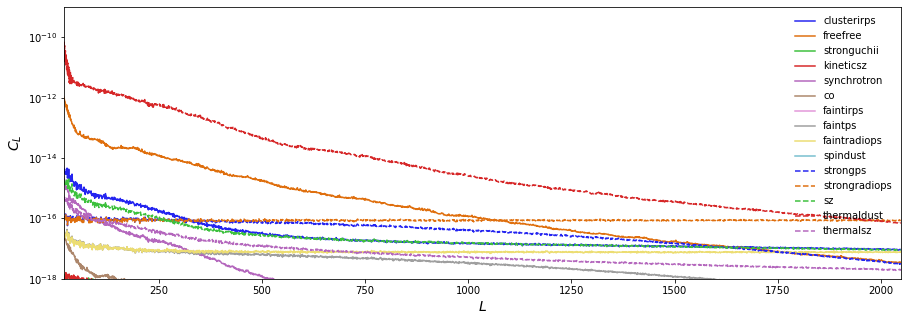

In [42]:
pl.plot_1dstyle(fsize=[15,5],ylog=True,ymin=1e-18,ymax=1e-9)
for i, key in enumerate(fgfiles.keys()):
#for key in ['thermaldust','stronguchii']:
    ls = '-'
    if i>=10: ls='--'
    plot(cl[key],label=key,ls=ls)
legend()